In [23]:
import tensorflow as tf
from tensorflow.keras.layers import *

In [24]:
tf.enable_eager_execution()
import numpy as np
import os
import time
import functools

In [25]:
path_to_file = 'chopin/chopin.abc'

In [26]:
text = open(path_to_file).read()

In [27]:
text[0:10]

'X: 1\nT: fr'

In [28]:
print("Dlugosc: ", len(text))

Dlugosc:  1413221


In [29]:
vocab = sorted(set(text))

In [30]:
char2idx = {u:i for i,u in enumerate(vocab)}

In [31]:
char2idx

{'\n': 0,
 ' ': 1,
 '"': 2,
 '#': 3,
 '%': 4,
 '&': 5,
 "'": 6,
 '(': 7,
 ')': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 '/': 12,
 '0': 13,
 '1': 14,
 '2': 15,
 '3': 16,
 '4': 17,
 '5': 18,
 '6': 19,
 '7': 20,
 '8': 21,
 '9': 22,
 ':': 23,
 ';': 24,
 '<': 25,
 '=': 26,
 '>': 27,
 '@': 28,
 'A': 29,
 'B': 30,
 'C': 31,
 'D': 32,
 'E': 33,
 'F': 34,
 'G': 35,
 'I': 36,
 'J': 37,
 'K': 38,
 'L': 39,
 'M': 40,
 'N': 41,
 'O': 42,
 'P': 43,
 'Q': 44,
 'R': 45,
 'S': 46,
 'T': 47,
 'V': 48,
 'W': 49,
 'X': 50,
 '[': 51,
 '\\': 52,
 ']': 53,
 '^': 54,
 '_': 55,
 'a': 56,
 'b': 57,
 'c': 58,
 'd': 59,
 'e': 60,
 'f': 61,
 'g': 62,
 'h': 63,
 'i': 64,
 'j': 65,
 'k': 66,
 'l': 67,
 'm': 68,
 'n': 69,
 'o': 70,
 'p': 71,
 'q': 72,
 'r': 73,
 's': 74,
 't': 75,
 'u': 76,
 'v': 77,
 'w': 78,
 'x': 79,
 'y': 80,
 'z': 81,
 '|': 82}

In [32]:
text_as_int = np.array([char2idx[c] for c in text])

In [33]:
text_as_int

array([50, 23,  1, ..., 60, 59,  0])

In [34]:
char2idx['X']

50

In [35]:
idx2char = np.array(vocab)

In [36]:
for char, _ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))

  '\n':   0,
  ' ' :   1,
  '"' :   2,
  '#' :   3,
  '%' :   4,
  '&' :   5,
  "'" :   6,
  '(' :   7,
  ')' :   8,
  ',' :   9,
  '-' :  10,
  '.' :  11,
  '/' :  12,
  '0' :  13,
  '1' :  14,
  '2' :  15,
  '3' :  16,
  '4' :  17,
  '5' :  18,
  '6' :  19,


In [37]:
seq_length = 100

In [38]:
examples_per_epoch = len(text) // seq_length

In [39]:
examples_per_epoch

14132

In [40]:
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

In [41]:
char_dataset

<DatasetV1Adapter shapes: (), types: tf.int64>

In [42]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

In [43]:
sequences

<DatasetV1Adapter shapes: (101,), types: tf.int64>

In [44]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [45]:
x, y = split_input_target("hello world")

In [46]:
x

'hello worl'

In [47]:
y

'ello world'

In [48]:
text_as_int[0:100]

array([50, 23,  1, 14,  0, 47, 23,  1, 61, 73, 70, 68,  1, 57, 56, 67, 67,
       56, 59, 60, 14, 11, 68, 64, 59,  0, 40, 23,  1, 17, 12, 17,  0, 39,
       23,  1, 14, 12, 21,  0, 44, 23, 14, 12, 17, 26, 14, 15, 13,  0, 38,
       23, 31,  1,  4,  1, 13,  1, 74, 63, 56, 73, 71, 74,  0, 51, 31,  9,
       21, 10, 31,  9,  9, 21, 10, 53, 82,  1, 52,  0, 51, 31,  9, 17, 10,
       31,  9,  9, 17, 10, 53,  1, 51, 54, 32,  9, 12, 15, 10, 31])

In [49]:
dataset = sequences.map(split_input_target)

In [50]:
for input_example, target_example in dataset.take(2):
    print (input_example)
    print(target_example)
    #for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    #    print("Step {:4d}".format(i))
    #    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    #    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Instructions for updating:
Colocations handled automatically by placer.
tf.Tensor(
[50 23  1 14  0 47 23  1 61 73 70 68  1 57 56 67 67 56 59 60 14 11 68 64
 59  0 40 23  1 17 12 17  0 39 23  1 14 12 21  0 44 23 14 12 17 26 14 15
 13  0 38 23 31  1  4  1 13  1 74 63 56 73 71 74  0 51 31  9 21 10 31  9
  9 21 10 53 82  1 52  0 51 31  9 17 10 31  9  9 17 10 53  1 51 54 32  9
 12 15 10 31], shape=(100,), dtype=int64)
tf.Tensor(
[23  1 14  0 47 23  1 61 73 70 68  1 57 56 67 67 56 59 60 14 11 68 64 59
  0 40 23  1 17 12 17  0 39 23  1 14 12 21  0 44 23 14 12 17 26 14 15 13
  0 38 23 31  1  4  1 13  1 74 63 56 73 71 74  0 51 31  9 21 10 31  9  9
 21 10 53 82  1 52  0 51 31  9 17 10 31  9  9 17 10 53  1 51 54 32  9 12
 15 10 31  9], shape=(100,), dtype=int64)
tf.Tensor(
[12 15 54 32  9  9 12 15 10 31  9  9 12 15 10 53 51 54 32  9 12 15 10 54
 32  9  9 12 15 10 31  9  9 12 15 53 51 54 32  9 10 54 32  9  9 10 53  1
 51 54 35  9 12 15 10 54 32  9 12 15 54 35  9  9 12 15 10 54 32  9  9 12
 15 10 5

In [51]:
BATCH_SIZE = 64
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [52]:
vocab_size = len(vocab)

In [53]:
embedding_dim = 256

In [54]:
rnn_units = 1024

In [55]:
LSTM = functools.partial(
    tf.keras.layers.LSTM, recurrent_activation='sigmoid')


In [56]:
LSTM = functools.partial(LSTM, 
  return_sequences=True, 
  recurrent_initializer='glorot_uniform',
  stateful=True
)

In [57]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
            Embedding(vocab_size, embedding_dim,
                      batch_input_shape=[batch_size, None]),
    LSTM(rnn_units),
    Dense(vocab_size)
    ])
    return model

In [58]:
model = build_model(
    vocab_size = len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE
)

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           21248     
_________________________________________________________________
lstm (LSTM)                  (64, None, 1024)          5246976   
_________________________________________________________________
dense (Dense)                (64, None, 83)            85075     
Total params: 5,353,299
Trainable params: 5,353,299
Non-trainable params: 0
_________________________________________________________________


In [60]:
for input_example_batch, target_example_batch in dataset.take(1): 
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 83) # (batch_size, sequence_length, vocab_size)


In [61]:
sampled_indices = tf.random.multinomial(example_batch_predictions[0], num_samples=1)


Instructions for updating:
Use tf.random.categorical instead.


In [62]:
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()


In [63]:
print("Input: \n", repr("".join(idx2char[input_example_batch[0]])))

Input: 
 "e''/2B/2-D/2][d''/2b'/2B/2] (3_g'/2b'/2d''/2 [e''/2-_G,/2-][e''/2d''/2D/2_G,/2][b'/2B/2-][_g'/2B/2] "


In [64]:
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices ])))

Next Char Predictions: 
 '^Q vK9yxEGf-Jnp\n@m\n"TO&vuAV4F71(7wzg=T5BF(R5my,d7P(h|M=Xn\\4>K7%sC/B2LFsTbQ7jrsnDM)FRk^&4vi/",N<h1s9q'


In [65]:
def compute_loss(labels, logits):
    return tf.keras.backend.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [66]:
example_batch_loss  = compute_loss(target_example_batch, example_batch_predictions)

In [67]:
print("scalar_loss:      ", example_batch_loss.numpy().mean())

scalar_loss:       4.418496


In [68]:
optimizer = tf.train.AdamOptimizer()
checkpoint_dir = './traning_checkpoints_abc'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")
import util_abc

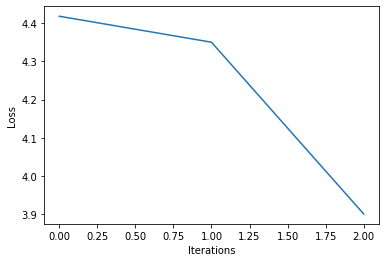

N/A%|#                                               |ETA:      N/A  Loss: 3.90

KeyboardInterrupt: 

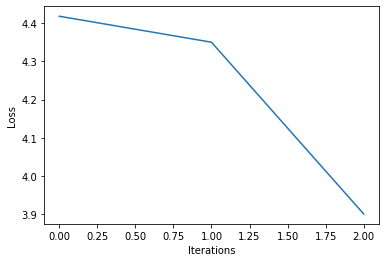

In [69]:
history = []
plotter = util_abc.PeriodicPlotter(sec=1, xlabel='Iterations', ylabel='Loss')

for epoch in range(5):
        hidden = model.reset_states()
        custom_msg = util_abc.custom_progress_text("Loss: %(loss)2.2f")
        bar = util_abc.create_progress_bar(custom_msg)
        for inp, target in bar(dataset):
        # Use tf.GradientTape()
            with tf.GradientTape() as tape:
                '''TODO: feed the current input into the model and generate predictions'''
                predictions = model(inp) # TODO
                '''TODO: compute the loss!'''
                loss = compute_loss(target, predictions) # TODO
        
            # Now, compute the gradients and try to minimize
            '''TODO: complete the function call for gradient computation'''
            grads = tape.gradient(loss, model.trainable_variables) # TODO
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            # Update the progress bar!
            history.append(loss.numpy().mean())
            custom_msg.update_mapping(loss=history[-1])
            plotter.plot(history)
    
        # Update the model with the changed weights!
        model.save_weights(checkpoint_prefix.format(epoch=epoch))
model.save("model_abc.hf5")

In [ ]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))